# Лекция 1. Введение

## Содержание  
[1.4 Pandas, Dataframes](#1.4)  
[1.5 Фильтрация данных](#1.5)  
[1.6 Группировка и агрегация](#1.6)  
[1.7 Визуализация, seaborn](#1.7)  
[1.8 Практические задания: Pandas](#1.8)  

## 1.4 Pandas, Dataframes<a id='1.4'></a>  

In [1]:
import numpy as np
import pandas as pd

In [2]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# описательные статистики
students_performance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
# используемые типы данных
students_performance.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [5]:
# "форма" датафрейма
students_performance.shape

(1000, 8)

In [6]:
# размер датафрейма
students_performance.size

8000

# .iloc

In [7]:
# отбор наблюдений и колонок по номеру позиции
students_performance.iloc[0:2, 0:3] # [строка, колонка]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college


In [8]:
students_performance.iloc[[0, 3, 10], [0, 5, -1]]

,gender,math score,writing score
0,female,72,74
3,male,47,44
10,male,58,52


# .loc

In [9]:
# именование индексов
students_performance_with_names = students_performance.iloc[[0, 3, 4, 7, 8]]
students_performance_with_names.index = ['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne']
students_performance_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [10]:
# отбор наблюдений и колонок по названию
students_performance_with_names.loc[['Cersei', 'Joffrey'], ['gender', 'writing score']]

,gender,writing score
Cersei,female,74
Joffrey,male,39


### pd.Series

In [11]:
students_performance_with_names.iloc[:, 0]

Cersei        female
Tywin           male
Gregor          male
Joffrey         male
Ilyn Payne      male
Name: gender, dtype: object

In [12]:
type(students_performance_with_names.iloc[:, 0])

pandas.core.series.Series

In [13]:
students_performance_with_names['gender'] # возвращает Series

Cersei        female
Tywin           male
Gregor          male
Joffrey         male
Ilyn Payne      male
Name: gender, dtype: object

In [14]:
students_performance_with_names[['gender']] # возвращает dataframe

,gender
Cersei,female
Tywin,male
Gregor,male
Joffrey,male
Ilyn Payne,male


In [15]:
# объединение серий в датафрейм
my_series_1 = pd.Series([1,2,3], index=['Cersei', 'Tywin', 'Gregor'])
my_series_2 = pd.Series([4,5,6], index=['Cersei', 'Tywin', 'Gregor'])

pd.DataFrame({'col_name_1':my_series_1, 'col_name_2':my_series_2})

,col_name_1,col_name_2
Cersei,1,4
Tywin,2,5
Gregor,3,6


### Задания

**1)**  
Какие способы позволяют отобрать 7 первых строк датафрэйма df?  
*.loc[:6] - включая 6, .iloc[:6] - не включая 6.*
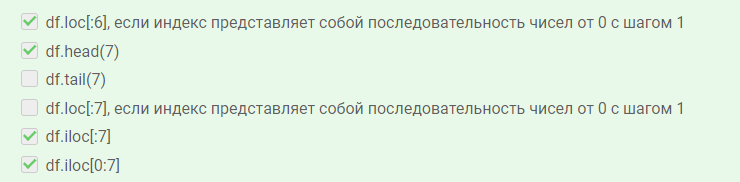

**2)**  
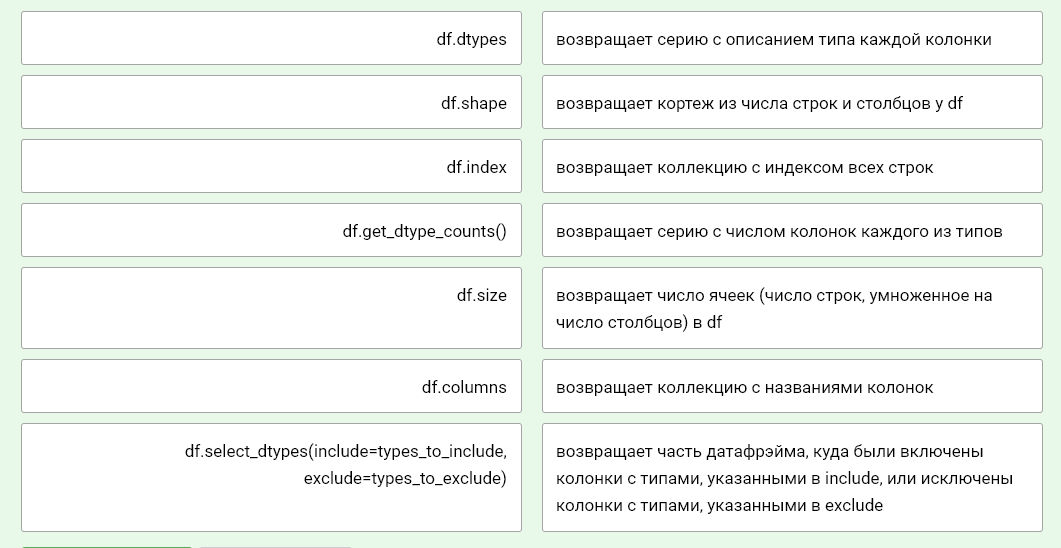  
*get_dtype_counts is deprecated*

**3)**  
А теперь используем эти методы на знаменитом титаническом датасэте! Загрузите датасэт, посмотрите на датафрэйм и ответьте на вопросы  

In [16]:
titanic_df = pd.read_csv("https://stepik.org/media/attachments/course/4852/titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
n_columns = titanic_df.shape[1]
n_rows = titanic_df.shape[0]

In [18]:
n_types = titanic_df.dtypes.value_counts()
n_types

int64      5
object     5
float64    2
dtype: int64

In [19]:
n_int_type = n_types[0]
n_object_type = n_types[1]
n_float_type = n_types[2]

In [20]:
print('Число колонок в представленном датафрэйме', n_columns,
      ', а число строк', n_rows,
      'Тип float имеют', n_float_type,
      'колонки, int -', n_int_type,
      'и object', n_object_type) 

Число колонок в представленном датафрэйме 12 , а число строк 891 Тип float имеют 2 колонки, int - 5 и object 5


## 1.5 Фильтрация данных<a id='1.5'></a>  

In [1]:
import numpy as np
import pandas as pd

In [2]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
# Сравнение Series
students_performance.gender == 'female'

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997     True
998     True
999     True
Name: gender, Length: 1000, dtype: bool

In [5]:
# Отбор по значению колонки
students_performance.loc[students_performance.gender == 'female', ['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [6]:
# среднее значение
mean_writing_score = students_performance['writing score'].mean()
mean_writing_score

68.054

In [7]:
# Все значения выше среднего
students_performance.loc[students_performance['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


### .rename

In [8]:
students_performance = students_performance \
    .rename(columns =
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course', 
            'math score': 'math_score',
            'reading score': 'reading_score',
            'writing score': 'writing_score'})

students_performance.head(1)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74


### .query

In [9]:
students_performance.query('writing_score > 74').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [10]:
students_performance.query("gender == 'female'").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [11]:
# несколько условий
students_performance.query("gender == 'female' | writing_score > 78").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [12]:
# работа с переменными через @ - символ экранирования
writing_score_query = 92
students_performance.query("gender == 'female' & writing_score > @writing_score_query").head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
106,female,group D,master's degree,standard,none,87,100,100
110,female,group D,associate's degree,free/reduced,completed,77,89,98
114,female,group E,bachelor's degree,standard,completed,99,100,100
122,female,group C,some college,standard,completed,88,93,93


In [13]:
# Обратите внимание, query не применяется к колонкам, название которых содержит недопустимые символы (типа пробел, слэша). 
# Ещё пример query, аналогичный isin() - 
#variants = ['var1', 'var2']
#df.query('col1 == @variants')

### .filter  

Аргумент like отбирает те лэйблы, где встречается поданное значение  
Аргумент regex отбирает лэйблы, подходящие к переданному паттерну  
Аргумент items отбирает лэйблы, переданные в коллекции в качестве значения  
Можно использовать только один из аргументов items, like, regex  
Аргумент axis отвечает за то, какие лэйблы мы рассматриваем - индекс или колонки  

In [14]:
students_performance[['math_score', 'reading_score']].head()

,math_score,reading_score
0,72,72
1,69,90
2,90,95
3,47,57
4,76,78


In [15]:
list(students_performance)

['gender',
 'race/ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [16]:
# отбор score колонок
score_columns = [i for i in list(students_performance) if 'score' in i]
score_columns

['math_score', 'reading_score', 'writing_score']

In [17]:
students_performance[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [18]:
students_performance.filter(like='score').head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [19]:
# отбор всех строк с "о" в индексе
students_performance_with_names = students_performance.iloc[[0, 3, 4, 7, 8]]
students_performance_with_names.index = ['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne']

students_performance_with_names.filter(like='o', axis=0) # axis=0 - строки, axis=1 - столбцы

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39


### .select_dtypes

In [20]:
# выбор всех колонок с типом int
students_performance.select_dtypes(include=['int64']).head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [21]:
# выбор всех колонок исключая int
students_performance.select_dtypes(exclude=['int64']).head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none


### Задачи

**1)**  
Аналитик Ярослав захотел отфильтровать данные по комбинации условий и отобрать только те наблюдения, у которых значение по переменной writing score >  100, а значение переменной gender == female. Для этого Ярослав написал следующий запрос:   
``` python
students_performance[students_performance['writing score'] > 100 and students_performance.gender == 'female']
```  
Однако в результате получил такую ошибку:  

**Truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all()**  

Итак, давайте разберемся в чем же была проблема с запросом Ярослава?

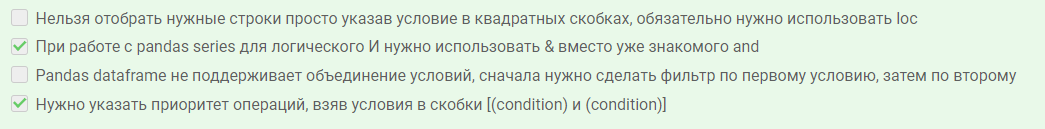

In [22]:
query = (students_performance['writing_score'] > mean_writing_score) & (students_performance['gender'] == 'female')
query

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999     True
Length: 1000, dtype: bool

In [23]:
students_performance[query].head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


**2)**  
У какой доли студентов из датасэта в колонке lunch указано free/reduced?  
Формат ответа десятичная дробь, например, 0.25  

In [24]:
(students_performance['lunch'] == 'free/reduced').sum() / students_performance.shape[0]

0.355

**3)**  
Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?  

In [25]:
# стандартный ланч
students_standart_lunch = students_performance.loc[students_performance['lunch'] == 'standard']
# среднее
print('Standart lunch Mean: \n',students_standart_lunch.iloc[: ,-3:].mean())
# дисперсия
print('Standart lunch Var: \n', students_standart_lunch.iloc[: ,-3:].var())

Standart lunch Mean: 
 math_score       70.034109
reading_score    71.654264
writing_score    70.823256
dtype: float64
Standart lunch Var: 
 math_score       186.418089
reading_score    191.285560
writing_score    205.620887
dtype: float64


In [26]:
# урезанный ланч
students_reduced_lunch = students_performance.loc[students_performance['lunch'] == 'free/reduced']
# среднее
print('Reduced lunch Mean: \n',students_reduced_lunch.iloc[: ,-3:].mean())
# дисперсия
print('Reduced lunch Var: \n', students_reduced_lunch.iloc[: ,-3:].var())

Reduced lunch Mean: 
 math_score       58.921127
reading_score    64.653521
writing_score    63.022535
dtype: float64
Reduced lunch Var: 
 math_score       229.824270
reading_score    221.871139
writing_score    238.202881
dtype: float64


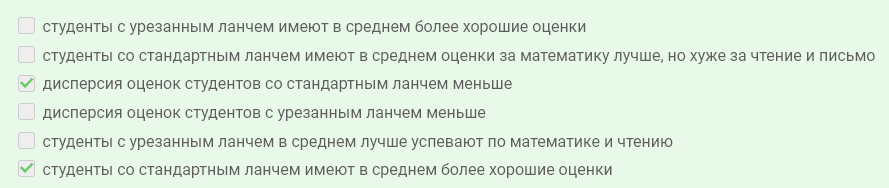

**4)**  
Соотнесите строчку кода и результат её выполнения. Переменная student_stats содержит датафрэйм с данными о студентах.   

Чтобы было удобно, сойдёмся на одинаковых терминах:  
parental level of education - уровень образования родителей;  
bachelor's degree - бакалаврская степень;  
master's degree - магистерская степень;  
test preparation course - тест;  

*наблюдения, студенты, строки - одно и то же в данном случае*  

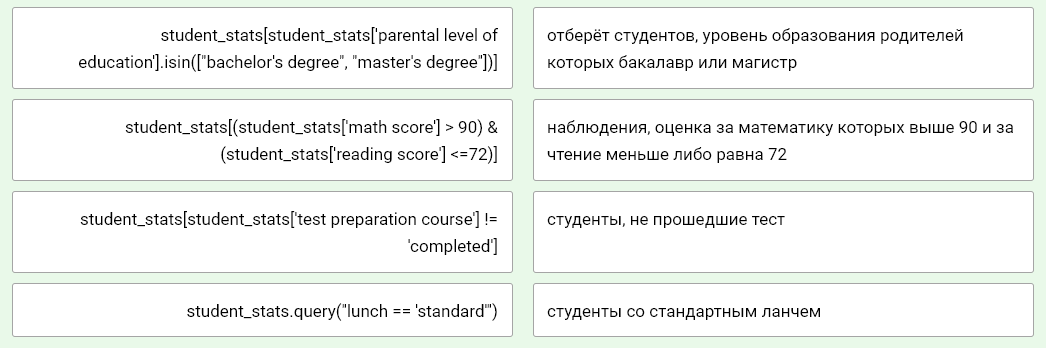

**5)**  
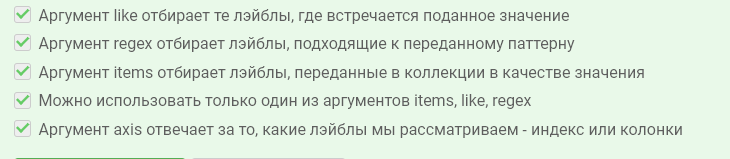

**6)**  
В переменной df  сохранен датафрэйм с произвольным числом колонок и строк. Отберите колонки, в которых есть '-' в датафрэйме df (вот соответствующий датасэт). Сохраните их в переменную selected_columns.

In [27]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/column_hell.csv')
df.head()

,yrh&6,ohku,q,hfxx,umeca-4,apj,g,ijvnixxo,kudbpyw-3,upubjv,...,fi,clsruyy,g&6,qo$6,ap,o,sladymzr,tif,wuikzxt,wzuvc
0,0.288397,0.911359,0.488069,0.074599,0.016124,0.090555,0.560810,0.110975,0.430787,0.548763,...,0.793122,0.070335,0.145115,0.686579,0.071681,0.563068,0.815201,0.081902,0.333237,0.185148
1,0.861276,0.134987,0.701885,0.897921,0.507115,0.740151,0.963179,0.712024,0.671662,0.497596,...,0.477181,0.767931,0.996055,0.948774,0.054327,0.087341,0.072166,0.856081,0.120481,0.622113
2,0.775577,0.832874,0.862665,0.831049,0.003274,0.703112,0.509795,0.573296,0.286411,0.282792,...,0.421542,0.770413,0.749468,0.395022,0.307752,0.535575,0.341393,0.971201,0.714558,0.702453
3,0.857910,0.555818,0.598305,0.473988,0.784139,0.427963,0.725103,0.286610,0.863717,0.545562,...,0.240252,0.010355,0.759912,0.965837,0.110719,0.439488,0.816526,0.111621,0.373365,0.461615
4,0.748652,0.451725,0.252619,0.584361,0.011265,0.051115,0.755444,0.627191,0.206172,0.955043,...,0.846165,0.043458,0.209347,0.028276,0.700446,0.203503,0.181903,0.428842,0.099398,0.175227


In [28]:
selected_columns = df.filter(like='-')
selected_columns.head()

,umeca-4,kudbpyw-3,g-3,v-9,fla-6,hwtbyrkp-5
0,0.016124,0.430787,0.202407,0.725508,0.305076,0.979296
1,0.507115,0.671662,0.864249,0.867818,0.358859,0.160520
2,0.003274,0.286411,0.928865,0.719159,0.340235,0.734612
3,0.784139,0.863717,0.175446,0.554744,0.049325,0.621132
4,0.011265,0.206172,0.044151,0.163643,0.048806,0.437836


## 1.6 Группировка и агрегация<a id='1.6'></a>  

In [1]:
import numpy as np
import pandas as pd

In [2]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance = students_performance \
    .rename(columns =
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course', 
            'math score': 'math_score',
            'reading score': 'reading_score',
            'writing score': 'writing_score'})

students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### .groupby

In [3]:
students_performance.groupby('gender').mean(numeric_only=True)

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [4]:
students_performance.groupby('gender', as_index=False) \
    .aggregate({'math_score': 'mean', 
                'reading_score': 'max', 
                'writing_score': 'var'}) \
    .rename(columns = {'math_score': 'mean_math_score',
                       'reading_score': 'max_reading_score',
                       'writing_score': 'var_writing_score'})

,gender,mean_math_score,max_reading_score,var_writing_score
0,female,63.633205,100,220.369327
1,male,68.728216,100,199.200248


In [5]:
# группировка по двум признакам + as_index = True (составной индекс)
grouped_scores = students_performance.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math_score': 'mean', 
                'reading_score': 'max', 
                'writing_score': 'var'}) \
    .rename(columns = {'math_score': 'mean_math_score',
                       'reading_score': 'max_reading_score',
                       'writing_score': 'var_writing_score'})

grouped_scores

mean_math_score  max_reading_score  var_writing_score
gender race/ethnicity                                                       
female group A               58.527778                100         214.694444
       group B               61.403846                 97         221.754948
       group C               62.033333                100         219.235258
       group D               65.248062                100         192.288517
       group E               70.811594                100         246.605286
male   group A               63.735849                 96         229.130624
       group B               65.930233                 96         220.668263
       group C               67.611511                100         186.249922
       group D               69.413534                 97         175.895876
       group E               76.746479                100         180.899396

### MultiIndex

In [6]:
grouped_scores.index

MultiIndex([('female', 'group A'),
            ('female', 'group B'),
            ('female', 'group C'),
            ('female', 'group D'),
            ('female', 'group E'),
            (  'male', 'group A'),
            (  'male', 'group B'),
            (  'male', 'group C'),
            (  'male', 'group D'),
            (  'male', 'group E')],
           names=['gender', 'race/ethnicity'])

In [7]:
# обращение к составным индексам
grouped_scores.loc[('female','group A')]

mean_math_score       58.527778
max_reading_score    100.000000
var_writing_score    214.694444
Name: (female, group A), dtype: float64

In [8]:
grouped_scores.loc[[('female','group A'), ('female', 'group B')]]

mean_math_score  max_reading_score  var_writing_score
gender race/ethnicity                                                       
female group A               58.527778                100         214.694444
       group B               61.403846                 97         221.754948

In [9]:
students_performance.math_score.nunique()

81

In [10]:
students_performance.groupby(['gender', 'race/ethnicity']).math_score.nunique()

gender  race/ethnicity
female  group A           29
        group B           51
        group C           59
        group D           53
        group E           44
male    group A           38
        group B           43
        group C           56
        group D           49
        group E           38
Name: math_score, dtype: int64

### .sort_values

In [11]:
students_performance.sort_values(['gender', 'math_score'], ascending = False)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
...,...,...,...,...,...,...,...,...
145,female,group C,some college,free/reduced,none,22,39,33
787,female,group B,some college,standard,none,19,38,32
17,female,group B,some high school,free/reduced,none,18,32,28
980,female,group B,high school,free/reduced,none,8,24,23


In [12]:
# топ 5 математиков юношей и топ 5 математиков девушек
students_performance.sort_values(['gender', 'math_score'], ascending = False).groupby('gender').head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


### Операции с сериями

In [13]:
# простые операции
students_performance['total_score'] = students_performance.math_score + students_performance.reading_score + students_performance.writing_score
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [14]:
# более сложные операции
students_performance = students_performance.assign(total_score_log = np.log(students_performance.total_score))
students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722


In [15]:
# удаление колонок
students_performance.drop(['total_score', 'lunch'], axis=1).head()

,gender,race/ethnicity,parental_level_of_education,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722


### Задания

**1)**  
Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs), и заполните их число в задании ниже.  

*Число героев с "0 ног" -   
 Число героев с 2-мя ногами -   
 Число героев с 4-мя ногами -   
 Число героев с 6-ю ногами -   
 Число героев с 8-ю ногами -*   

In [16]:
dota_hero_stats = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col = 0)
dota_hero_stats.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [17]:
dota_hero_legs_count = dota_hero_stats.groupby(['legs']).id.count()

print('Число героев с "0 ног" -', dota_hero_legs_count.iloc[0],',\n',
      'Число героев с 2-мя ногами -', dota_hero_legs_count.iloc[1],',\n',
      'Число героев с 4-мя ногами -', dota_hero_legs_count.iloc[2],',\n',
      'Число героев с 6-ю ногами -', dota_hero_legs_count.iloc[3],',\n',
      'Число героев с 8-ю ногами -', dota_hero_legs_count.iloc[4],'.\n',)

Число героев с "0 ног" - 11 ,
 Число героев с 2-мя ногами - 95 ,
 Число героев с 4-мя ногами - 7 ,
 Число героев с 6-ю ногами - 3 ,
 Число героев с 8-ю ногами - 1 .



**2)**  
К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.  

In [18]:
accountancy_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/accountancy.csv', index_col = 0)
accountancy_df.head()

,Executor,Type,Salary
0,Pupa,D,63
1,Pupa,A,158
2,Pupa,D,194
3,Pupa,E,109
4,Loopa,E,184


In [19]:
accountancy_df.Type.unique()

array(['D', 'A', 'E', 'F', 'B', 'C'], dtype=object)

In [20]:
accountancy_df.groupby(['Type', 'Executor'], as_index=False) \
    .mean() \
    .sort_values(['Type','Salary'], ascending = [True,False]) \
    .groupby('Type') \
    .head(1)

,Type,Executor,Salary
1,A,Pupa,160.833333
2,B,Loopa,145.166667
4,C,Loopa,154.333333
7,D,Pupa,146.500000
8,E,Loopa,164.000000
10,F,Loopa,238.000000


In [21]:
accountancy_df.pivot_table(values = "Salary", index = "Executor", columns = "Type")

Type,A,B,C,D,E,F
Executor,,,,,,
Loopa,58.000000,145.166667,154.333333,137.714286,164.0,238.00
Pupa,160.833333,77.000000,74.500000,146.500000,131.2,136.25


**3)**  
Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.  

In [22]:
dota_hero_stats.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [23]:
dota_hero_stats.groupby(['attack_type', 'primary_attr']).agg({'id': 'count'}).sort_values('id', ascending=False)

id
attack_type primary_attr    
Ranged      int           40
Melee       str           35
            agi           19
Ranged      agi           18
            str            3
Melee       int            2

In [24]:
dota_hero_stats.filter(items=['attack_type','primary_attr']).mode()

,attack_type,primary_attr
0,Ranged,int


**4)**  
Аспирант Ростислав изучает метаболом водорослей и получил такую табличку. В ней он записал вид каждой водоросли, её род (группа, объединяющая близкие виды), группа (ещё одно объединение водорослей в крупные фракции) и концентрации анализируемых веществ.  

Помогите Ростиславу найти среднюю концентрацию каждого из веществ в каждом из родов (колонка genus)! Для этого проведите группировку датафрэйма, сохранённого в переменной concentrations, и примените метод, сохранив результат в переменной mean_concentrations.

In [25]:
concentrations = pd.read_csv('http://stepik.org/media/attachments/course/4852/algae.csv')
concentrations.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [26]:
mean_concentrations = concentrations.groupby('genus').mean(numeric_only=True)
mean_concentrations

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


**5)**  
Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.  

In [27]:
print(np.round(concentrations.query('genus == "Fucus"').alanin.min(), 2), 
      np.round(concentrations.query('genus == "Fucus"').alanin.mean(), 2), 
      np.round(concentrations.query('genus == "Fucus"').alanin.max(), 2))

0.35 3.57 6.64


**6)**  
Сгруппируйте данные по переменной group и соотнесите вопросы с ответами.

In [28]:
# Число видов бурых, зелёных и красных водорослей
concentrations.groupby('group').species.count()

group
brown    6
green    3
red      1
Name: species, dtype: int64

In [29]:
# Размах (максимум - минимум) сахарозы в бурых, зелёных и красных водорослях
concentrations.groupby('group').agg({'sucrose': 'max'}) - concentrations.groupby('group').agg({'sucrose': 'min'})

,sucrose
group,
brown,5.189345
green,3.259662
red,0.000000


In [30]:
# Дисперсия концентрации цитрата в бурых, зелёных и красных водорослях
concentrations.groupby('group').agg({'sucrose': 'var'})

,sucrose
group,
brown,5.459098
green,2.672626
red,NaN


In [31]:
# все вместе
concentrations.groupby('group') \
    .agg({'glucose': 'count', 'sucrose': lambda x: x.max() - x.min(), 'citrate': 'var'}) \
    .round(2)

,glucose,sucrose,citrate
group,,,
brown,6,5.19,5.47
green,3,3.26,3.95
red,1,0.00,NaN


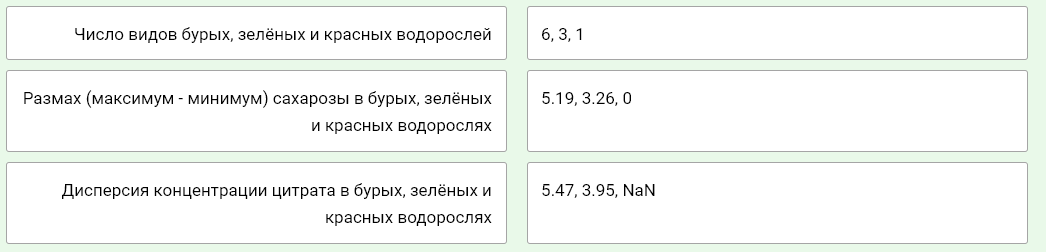

## 1.7 Визуализация, seaborn<a id='1.7'></a>  

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
students_performance = pd.read_csv('https://stepik.org/media/attachments/course/4852/StudentsPerformance.csv')
students_performance = students_performance \
    .rename(columns =
           {'parental level of education': 'parental_level_of_education',
            'test preparation course': 'test_preparation_course', 
            'math score': 'math_score',
            'reading score': 'reading_score',
            'writing score': 'writing_score'})

students_performance.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<Axes: >

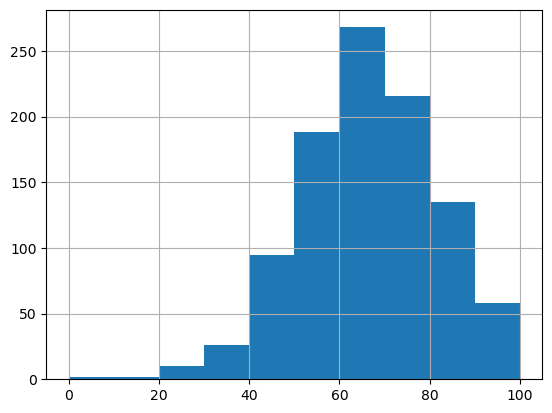

In [4]:
students_performance.math_score.hist()

<Axes: xlabel='math_score', ylabel='reading_score'>

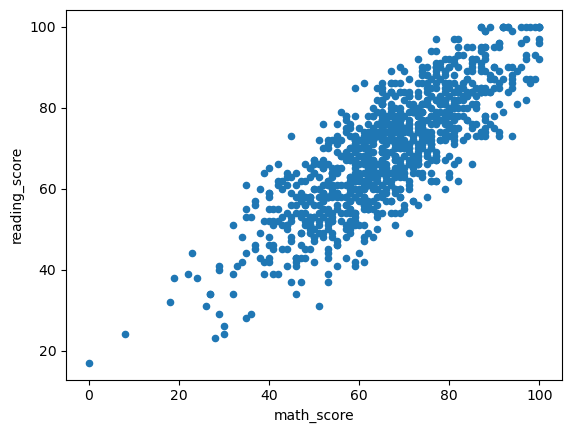

In [5]:
students_performance.plot.scatter(x='math_score', y='reading_score')

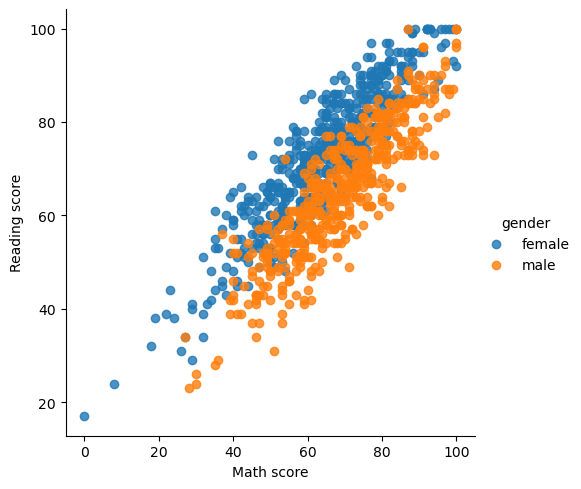

In [6]:
ax = sns.lmplot(x='math_score', y='reading_score', hue='gender', data=students_performance, fit_reg=False)
ax.set_xlabels('Math score')
ax.set_ylabels('Reading score')

### Задачи

**1)**  
Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.  

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)  
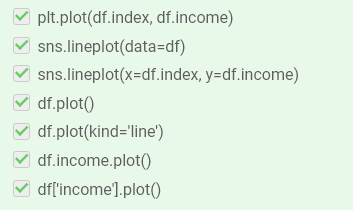

In [7]:
income_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/income.csv')
income_df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


**2)**  
Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.  

В ответе вы должны указать число кластеров в виде числа (например: 3).  

In [8]:
# data = pd.read_clipboard()
data = pd.read_csv("Data\Лекция 1\dataset_209770_6.txt", sep=" ")
data.head()

,x,y
0,1490.220304,290.872554
1,887.449527,1202.750721
2,1495.486666,305.799380
3,907.514563,1190.753711
4,1506.079425,301.613930


<Axes: xlabel='x', ylabel='y'>

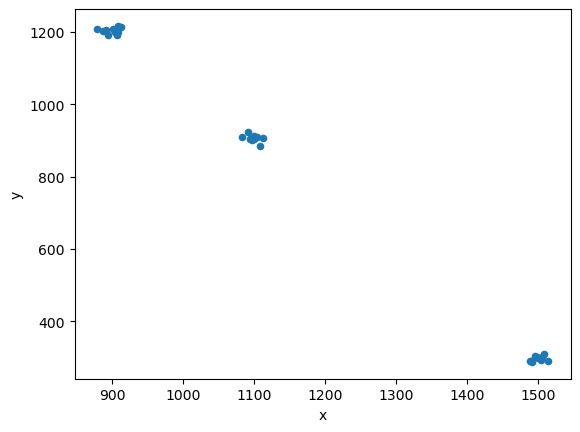

In [9]:
data.plot.scatter(x='x', y='y')

**3)**  
Скачайте данные, представляющие геномные расстояния между видами, и постройте тепловую карту, чтобы различия было видно наглядно. В ответ впишите, какая картинка соответствует скачанным данным.

In [10]:
genome_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/genome_matrix.csv', index_col = 0)
genome_df.head()

,species0,species1,species2,species3,species4
species0,0.536029,0.920292,0.679708,0.840606,0.430842
species1,0.920292,0.862417,0.887593,0.769754,0.203214
species2,0.679708,0.887593,0.595156,0.003435,0.096052
species3,0.840606,0.769754,0.003435,0.458870,0.029251
species4,0.430842,0.203214,0.096052,0.029251,0.642109


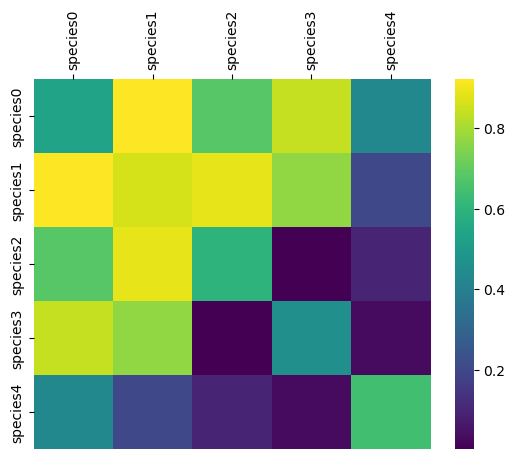

In [11]:
g = sns.heatmap(genome_df, cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

**4)**  
Пришло время узнать, какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [12]:
dota_hero_stats = pd.read_csv('https://stepik.org/media/attachments/course/4852/dota_hero_stats.csv', index_col = 0)
dota_hero_stats.head()

,attack_type,id,legs,localized_name,name,primary_attr,roles
0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


<Axes: >

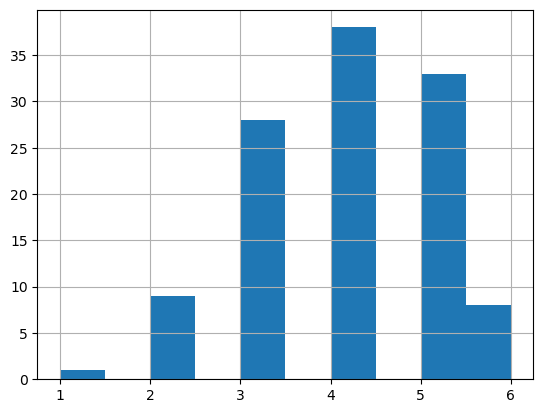

In [13]:
dota_hero_stats.roles.apply(lambda x: len(eval(x))).hist()

**5)**  
Теперь перейдём к цветочкам. Магистрантка Адель решила изучить какие бывают ирисы. Помогите Адель узнать об ирисах больше - скачайте датасэт со значениями параметров ирисов, постройте их распределения и отметьте правильные утверждения, глядя на график. 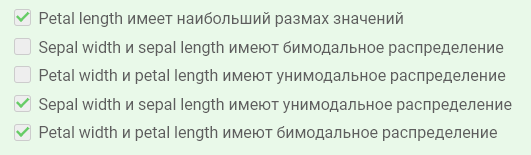

In [14]:
iris_df = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv', index_col=0)
iris_df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: ylabel='Density'>

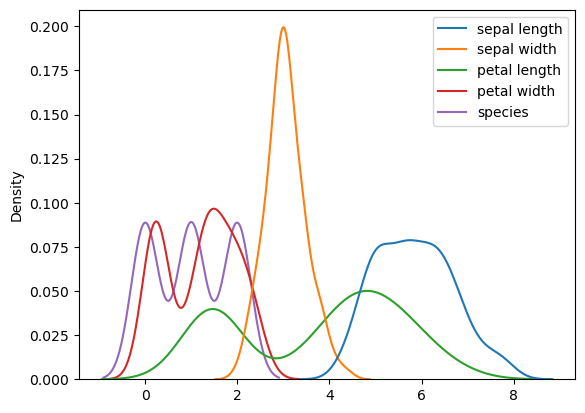

In [15]:
sns.kdeplot(iris_df)            

**6)**  
Рассмотрим длину лепестков (petal length) подробнее и воспользуемся для этого violin плотом. Нарисуйте распределение длины лепестков ирисов из предыдущего датасэта с помощью violin плота и выберите правильный (такой же) вариант среди предложенных

<Axes: >

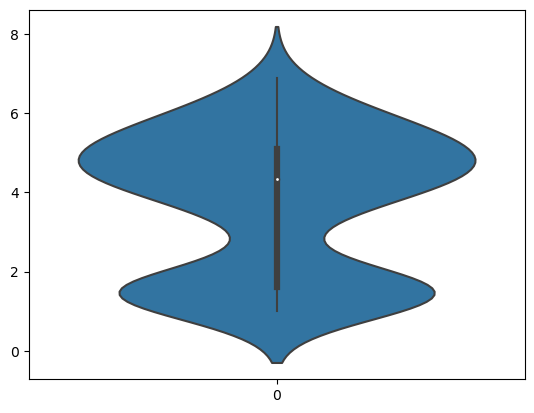

In [16]:
sns.violinplot(iris_df["petal length"])

**7)**  
Продолжаем изучение ирисов! Ещё один важный тип графиков - pairplot, отражающий зависимость пар переменных друг от друга, а также распределение каждой из переменных. Постройте его и посмотрите на scatter плоты для каждой из пар фичей. Какая из пар навскидку имеет наибольшую корреляцию?  
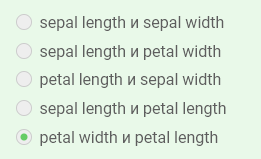

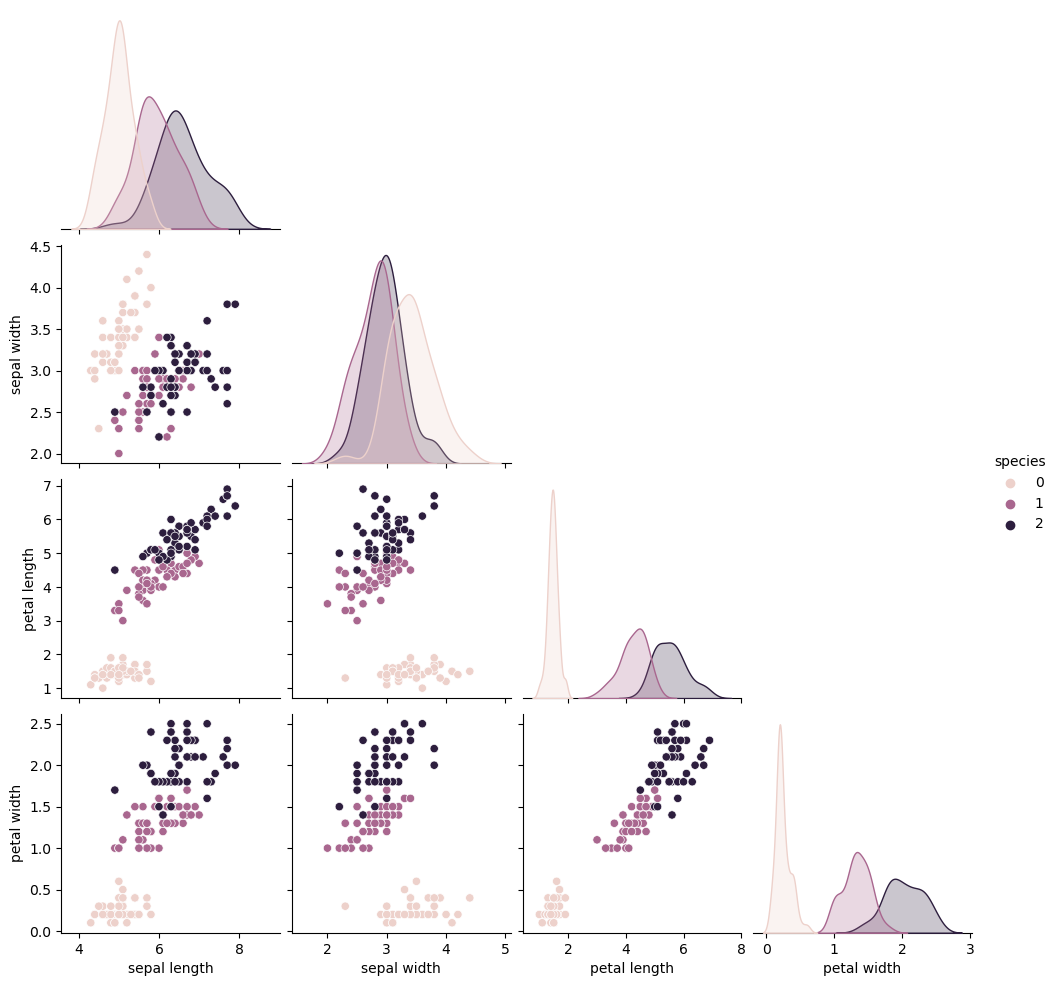

In [17]:
sns.pairplot(iris_df, hue="species", corner=True)

## 1.8 Практические задания: Pandas<a id='1.8'></a>  

In [1]:
import numpy as np
import pandas as pd

**1)**  Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:  
type   value  
A    10

A    14

B    12

B    23

In [2]:
my_data = pd.DataFrame({
    'type': ['A' ,'A' ,'B', 'B'],
    'value': [10, 14, 12, 23]})
my_data.dtypes


type     object
value     int64
dtype: object

**2)**  
Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):  

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.  
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

In [3]:
my_stat = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat.csv')
my_stat = my_stat.iloc[:20]
my_stat.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0


In [4]:
subset_1 = my_stat.iloc[:10, [0, 2]]
subset_1

,V1,V3
0,2,B
1,-1,B
2,0,A
3,2,A
4,0,B
5,2,A
6,0,A
7,1,A
8,0,B
9,-1,A


In [5]:
subset_2 = my_stat.iloc[:, [1, 3]].drop([0, 4], axis=0)
# my_stat.iloc[:, [1,3]][~my_stat.index.isin([0,4])]
subset_2

,V2,V4
1,7.0,1.0
2,11.0,0.0
3,11.0,2.0
5,11.0,0.0
6,9.0,2.0
7,9.0,1.0
8,9.0,2.0
9,10.0,0.0
10,10.0,1.0
11,10.0,1.0


**3)**  
В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:  
В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.  

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.  

In [6]:
subset_1 = my_stat[(my_stat['V1'] > 0) & (my_stat['V3'] == 'A')]
# subset_1 = my_stat.query("V1 > 0 & V3 == 'A'")
subset_1

,V1,V2,V3,V4
3,2,11.0,A,2.0
5,2,11.0,A,0.0
7,1,9.0,A,1.0
10,1,10.0,A,1.0
13,1,12.0,A,3.0


In [7]:
subset_2 = my_stat[(my_stat['V2'] != 10) | (my_stat['V4'] >= 1)]
# subset_2 = my_stat.query("V2 != 10 | V4 >= 1")
subset_2.head()

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
5,2,11.0,A,0.0


**4)**  
В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:  

V5 = V1 + V4  

V6 = натуральный логарифм переменной V2  

In [8]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat.head()

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


**5)**  
Переименуйте колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users

In [9]:
my_stat.rename(columns =
           {'V1': 'session_value',
            'V2': 'group', 
            'V3': 'time',
            'V4': 'n_users'}, inplace=True)
my_stat.head()

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585


**5)**  
В dataframe с именем my_stat_1 сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

In [10]:
my_stat_1 = pd.read_csv('https://stepik.org/media/attachments/course/4852/my_stat_1.csv')
my_stat_1

,session_value,time,group,n_users
0,0.0,12,B,9
1,NaN,11,A,-1
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,NaN,11,B,5
7,0.0,9,A,4
8,0.0,8,B,-11
9,0.0,9,A,-20


In [11]:
my_stat_1['session_value'] = my_stat_1['session_value'].fillna(0)
median = my_stat_1.loc[my_stat_1.n_users >= 0, 'n_users'].median()
my_stat_1['n_users'] = my_stat_1['n_users'].mask(my_stat_1['n_users'] < 0, median)
# my_stat_1.n_users = my_stat_1.n_users.apply(lambda x: x if x >= 0 else my_stat_1.n_users[my_stat_1.n_users >= 0].median())
my_stat_1

,session_value,time,group,n_users
0,0.0,12,B,9
1,0.0,11,A,5
2,1.0,8,A,1
3,2.0,9,B,3
4,2.0,10,B,9
5,3.0,8,A,8
6,0.0,11,B,5
7,0.0,9,A,4
8,0.0,8,B,5
9,0.0,9,A,5


**6)**  
В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.  

In [12]:
mean_session_value_data = my_stat_1.groupby(['group'], as_index=False).agg({'session_value': 'mean'}) \
    .rename(columns = {'session_value': 'mean_session_value'})
# mean_session_value_data = my_stat_1.groupby(['group'], as_index=False).agg(mean_session_value=('session_value', 'mean'))
mean_session_value_data

,group,mean_session_value
0,A,0.8
1,B,0.8
